# Interpretability

#### Imports

In [40]:
import pandas as pd
import pickle
import shap
import os
import sys

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../src/')
from visualization.visualize import *

import shap

from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

pd.set_option('display.max_columns', None)

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).


## Load model

In [42]:
with open('../models/model_1.pkl', 'rb') as fpkl:
    model1 = pickle.load(fpkl)
    
with open('../models/model_2.pkl', 'rb') as fpkl:
    model2 = pickle.load(fpkl)
    
with open('../models/model_tree.pkl', 'rb') as fpkl:
    tree = pickle.load(fpkl)

## Carregar dados

In [3]:
PATH = '../data/processed/'

In [4]:
X_test = pd.read_csv(os.path.join(PATH, 'X_test.csv'), sep=',', index_col=0)
y_test = pd.read_csv(os.path.join(PATH, 'y_test.csv'), sep=',', index_col=0)
print(X_test.shape)

(950, 102)


In [5]:
dataset = pd.read_csv(os.path.join(PATH, 'dataset_final.csv'), sep=',')
print(dataset.shape)
dataset.head()

(4748, 109)


,DESEMPENHO,CAPITAL,AREA,ESTIMATED_POP,RURAL_URBAN,GVA_PUBLIC,GVA_TOTAL,GDP,GDP_CAPITA,COMP_H,COMP_O,COMP_P,COMP_Q,DEPENDENCIAS_SALAS_AULA,DEPENDENCIAS_SALA_RECURSO,DEPENDENCIAS_TOT_SALAS_AULA,DEPENDENCIAS_CANTINA,DEPENDENCIAS_COPA,DEPENDENCIAS_REFEITORIO,DEPENDENCIAS_SALA_LEITURA,DEPENDENCIAS_TOT_SALA_LEITURA,DEPENDENCIAS_TOT_QUADRA,DEPENDENCIAS_SALA_PROF,DEPENDENCIAS_PATIO_COBERTO,DEPENDENCIAS_PATIO_DESCOBERTO,DEPENDENCIAS_TOT_VESTIARIO,DEPENDENCIAS_LAB_INFO,DEPENDENCIAS_LAB_CIENCIAS,DEPENDENCIAS_LAB_CIENCIA_FISICA_BIOLOGICA,DEPENDENCIAS_TOT_LAB_CIENCIA,DEPENDENCIAS_LAB_MULTIUSO,DEPENDENCIAS_OFICINA,DEPENDENCIAS_DORMITORIO,DEPENDENCIAS_SANITARIO_ADEQ_DEF,DEPENDENCIAS_SANITARIO_AL_MASC,DEPENDENCIAS_SANITARIO_AL_FEM,DEPENDENCIAS_TOT_SANITARIO_AL,DEPENDENCIAS_TOT_SANITARIO_FUNC,DEPENDENCIAS_DEPEND_ADEQ_DEF,DEPENDENCIAS_SALA_ED_FISICA,DEPENDENCIAS_SALA_PROG_ESC_FAMILIA,DEPENDENCIAS_BRINQUEDOTECA,DEPENDENCIAS_SALA_REFORCO,DEPENDENCIAS_AREA_SERVICO,DEPENDENCIAS_SALA_ATENDIMENTO,DEPENDENCIAS_SALA_ENTRETENIMENTO,FORMACAO_APERF/EXTENSIAOCULTURAL,FORMACAO_BACHARELADO/TECNIOLOGO,FORMACAO_DOUTORADO,FORMACAO_ENSINO_MEDIO,FORMACAO_ESPECIALIZACAO,FORMACAO_LICENCIATURA,FORMACAO_MESTRADO,FORMACAO_S/INFO,QTD_SERVIDORES,QTD_PROFESSORES,MEDIA_FORMACOES,QTD_FORMACAO_CONTINUADA,QTD_CARGOS_DISTINTOS,QTD_TOTAL_ALUNOS,QTD_CLASSES,MEDIA_ALUNOS_SALA,STD_ALUNOS_SALA,QTD_CLASSE_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS,QTD_CLASSE_TIPO_ENSINO MEDIO,QTD_CLASSE_TIPO_CEL,QTD_ALUNOS_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS,QTD_ALUNOS_TIPO_ENSINO MEDIO,QTD_ALUNOS_TIPO_CEL,JORNADA_QTD_DISCIPLINAS_mean,JORNADA_QTD_DISCIPLINAS_std,JORNADA_QTD_DISCIPLINAS_max,JORNADA_QTD_TOTAL_AULAS_mean,JORNADA_QTD_TOTAL_AULAS_std,JORNADA_QTD_TOTAL_AULAS_max,SERVIDORES_IDADE_mean,SERVIDORES_IDADE_std,SERVIDORES_TEMPO_CARGO_C_mean,SERVIDORES_TEMPO_CARGO_C_std,SERVIDORES_CAT_FUNCIONAL_A,SERVIDORES_CAT_FUNCIONAL_F,SERVIDORES_CAT_FUNCIONAL_N,SERVIDORES_CAT_FUNCIONAL_O,SERVIDORES_CAT_FUNCIONAL_P,MATEMATICA,LEITURA,ESCRITA,RELACAO_ALUNO_POR_SERVIDOR,RELACAO_ALUNO_POR_PROFESSOR,CLUSTER__0,CLUSTER__1,CLUSTER__2,CLUSTER__3,CLUSTER__4,CLUSTER__5,CLUSTER__6,CLUSTER__7,CLUSTER__8,CLUSTER__9,CLUSTER__10,CLUSTER__11,CLUSTER__12,CLUSTER__13,CLUSTER__14,CLUSTER__15,CLUSTER__16,CLUSTER__17,CLUSTER__18,CLUSTER__19
0,0.0,1.0,1521.11,12176866.0,1.0,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,35.0,0.0,35.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101695,0.008475,0.016949,0.016949,0.771186,0.084746,0.0,139.0,118.0,1.228814,13.0,6.0,2703.0,88.0,30.715909,7.214208,34.0,40.0,0.0,956.0,1229.0,0.0,3.486726,1.768348,10.0,48.849558,20.847756,108.0,46.691429,8.700472,10.725714,6.325839,0.794286,0.142857,0.0,0.062857,0.0,4.0,3.0,4.0,19.446043,22.906780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1521.11,12176866.0,1.0,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,21.0,1.0,22.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.094118,0.011765,0.000000,0.152941,0.729412,0.011765,0.0,92.0,85.0,1.305882,15.0,3.0,2164.0,69.0,31.362319,8.549116,34.0,29.0,0.0,1189.0,945.0,0.0,2.975000,1.492386,8.0,46.525000,19.308931,104.0,45.365385,8.625384,8.586538,5.766152,0.759615,0.173077,0.0,0.067308,0.0,4.0,3.0,4.0,23.521739,25.458824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1521.11,12176866.0,1.0,41902892.72,5.699105e+08,6.870359e+08,57071.43,19515.0,153.0,16030.0,22248.0,19.0,0.0,19.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,3.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089286,0.017857,0.000000,0.017857,0.839286,0.035714,0.0,66.0,56.0,1.160714,4.0,4.0,1189.0,35.0,33.971429,5.695642,0.0,35.0,0.0,0.0,1189.0,0.0,2.125000,0.489246,4.0,44.375000,16.629409,64.0,45.729167,8.617582,9.250000,7.2

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(['DESEMPENHO'], axis=1), dataset['DESEMPENHO'], test_size=0.2, random_state=17)

# Analise do resultado do Classificador LGBM

### Importancia das features
Este modelo baseado em comites de arvores de decisao tem o mecanismo de calcular a importancia que os atributos tiveram para predicao

In [18]:
feature_importances_df = pd.DataFrame(zip(X_train.columns, model1.feature_importances_))
feature_importances_df.columns = ['ATRIBUTO', 'IMPORTANCIA']
feature_importances_df = feature_importances_df.set_index('ATRIBUTO')

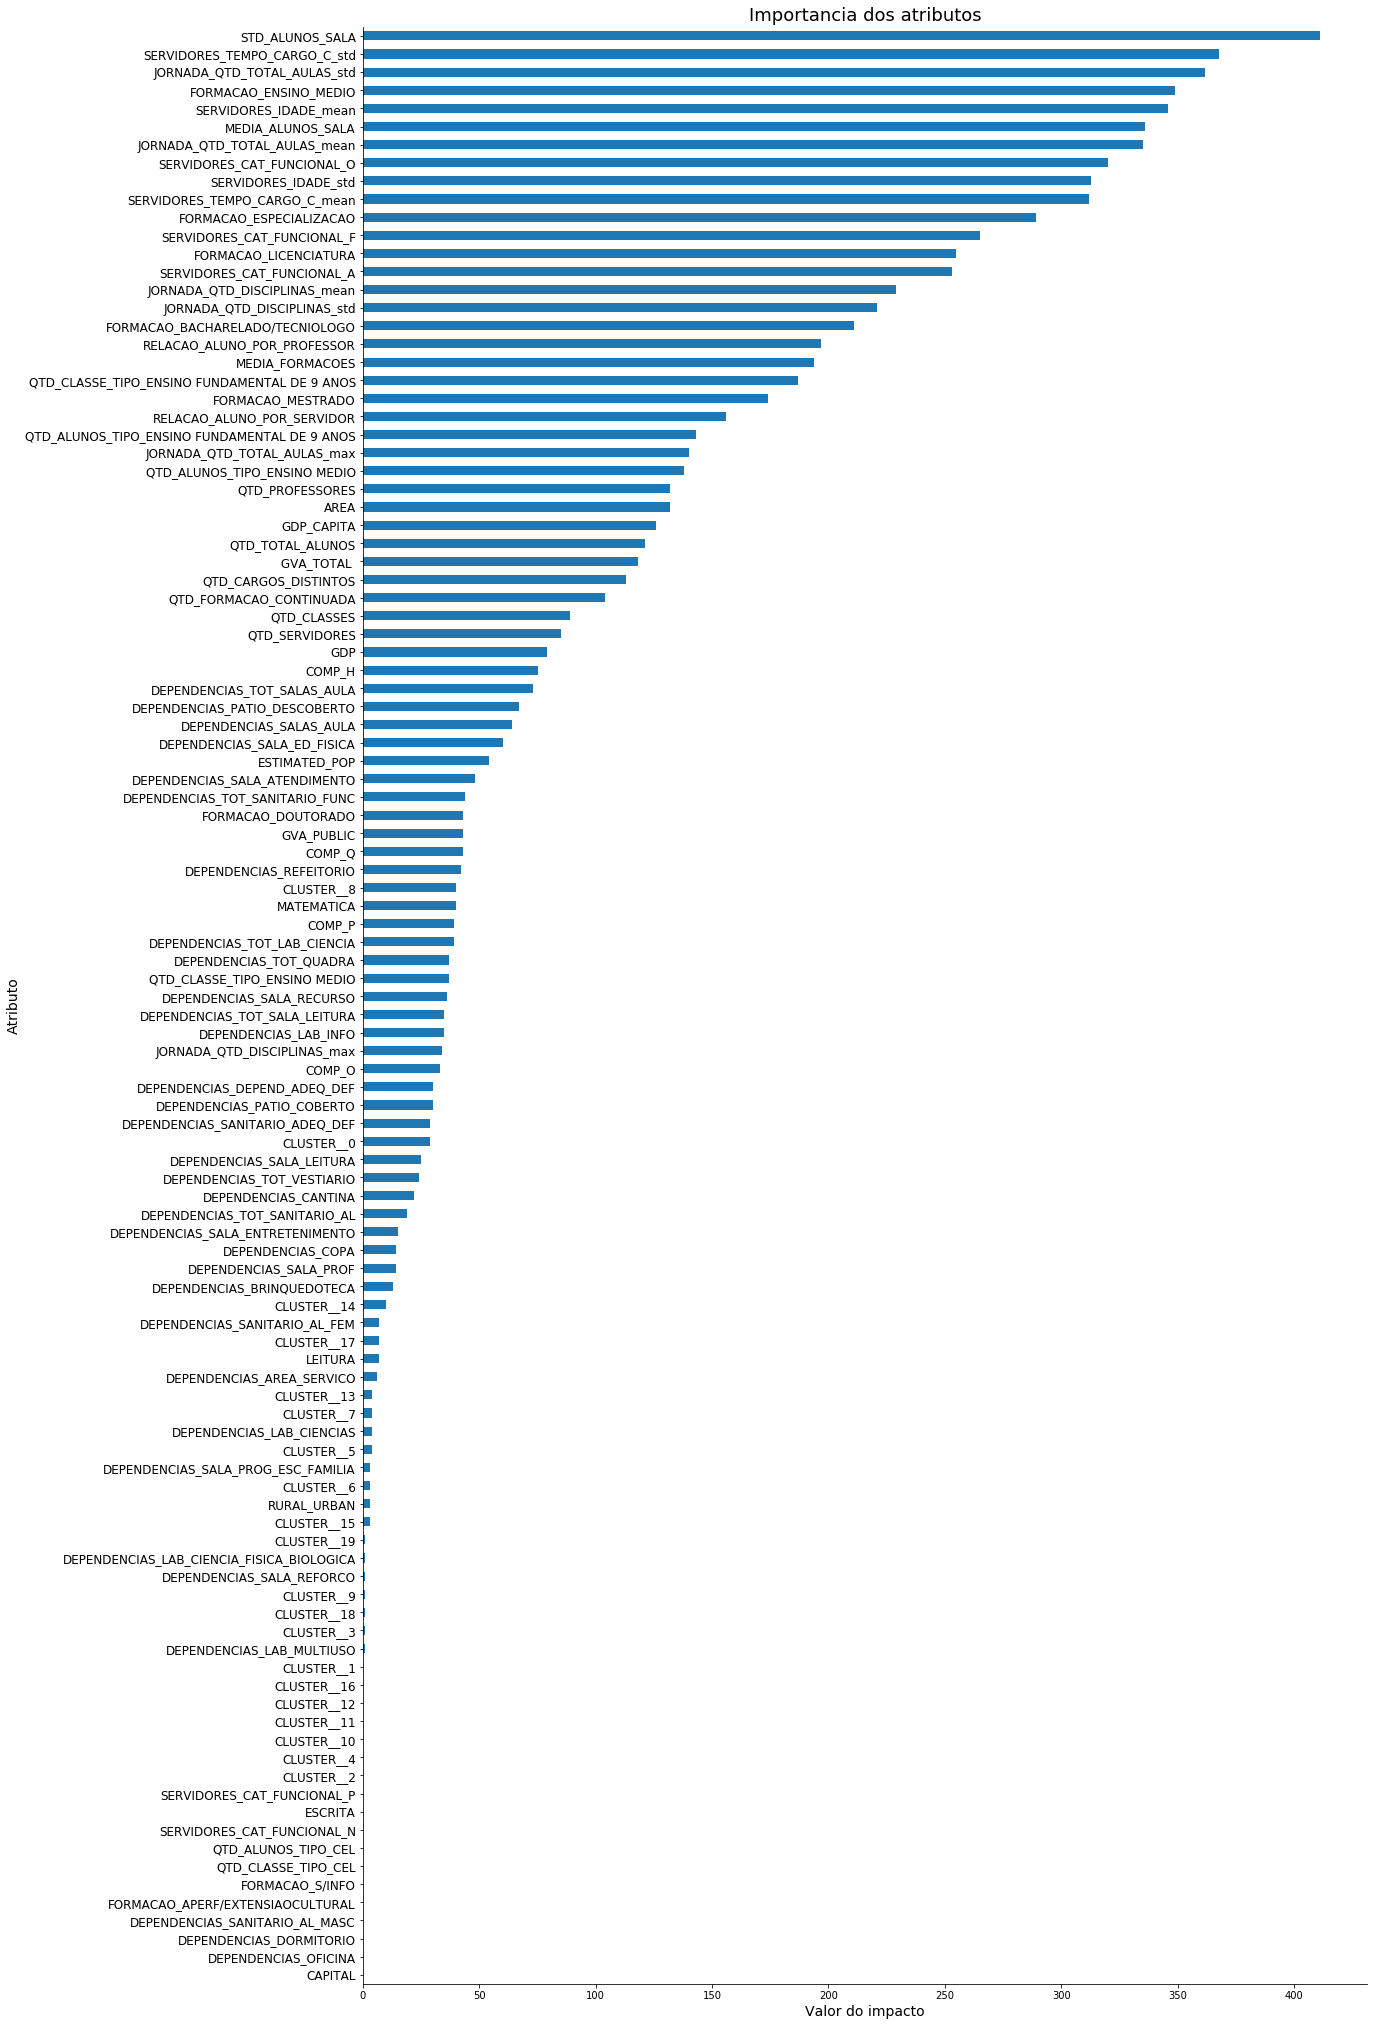

In [37]:
fig, ax = plt.subplots(figsize=(18, 36))
feature_importances_df.sort_values(by='IMPORTANCIA').plot(kind='barh', label=None, ax=ax)

ax.set_title('Importancia dos atributos', fontsize=18)
ax.set_ylabel('Atributo', fontsize=14)
ax.set_xlabel('Valor do impacto', fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='y', labelsize=12)

ax.get_legend().remove()

## 20 Atributos mais importantes

In [45]:
feature_importances_df.sort_values(by='IMPORTANCIA', ascending=False).head(20).index.to_frame(index=None)

,ATRIBUTO
0,STD_ALUNOS_SALA
1,SERVIDORES_TEMPO_CARGO_C_std
2,JORNADA_QTD_TOTAL_AULAS_std
3,FORMACAO_ENSINO_MEDIO
4,SERVIDORES_IDADE_mean
5,MEDIA_ALUNOS_SALA
6,JORNADA_QTD_TOTAL_AULAS_mean
7,SERVIDORES_CAT_FUNCIONAL_O
8,SERVIDORES_IDADE_std
9,SERVIDORES_TEMPO_CARGO_C_mean


## Shap (SHapley Additive exPlanations)

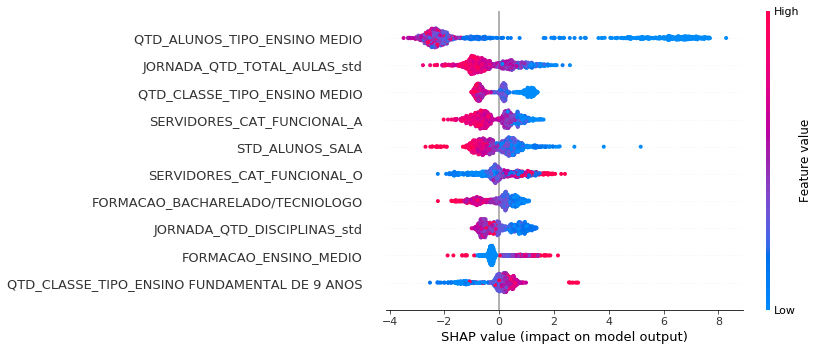

In [63]:
explainer = shap.TreeExplainer(model1)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, max_display=10)

### Relevancia muito alta para escolas com Ensino Medio
Como foi mencionado na secao de Machine Learning, o modelo aprende que escolas com ensino medio tendem a ter um desempenho ruim, o que faz sentido quando eh analisada a distribuicao dos desempenhos por serie, como pode ser visto na [analise do SARESP](01-eda-saresp.ipynb).

Esse fator ja eh uma informacao muito relevante e de alto grau de impacto

### Comparacao entre as distribuicoes de **Quantidade de Alunos do Ensino Medio** em escolas com desempenho BOM e RUIM
O grafico a seguir apresenta a densidade de probabilidade, dessa forma as amostras (escolas boas e escolas ruins) podem ter tamanhos diferentes.

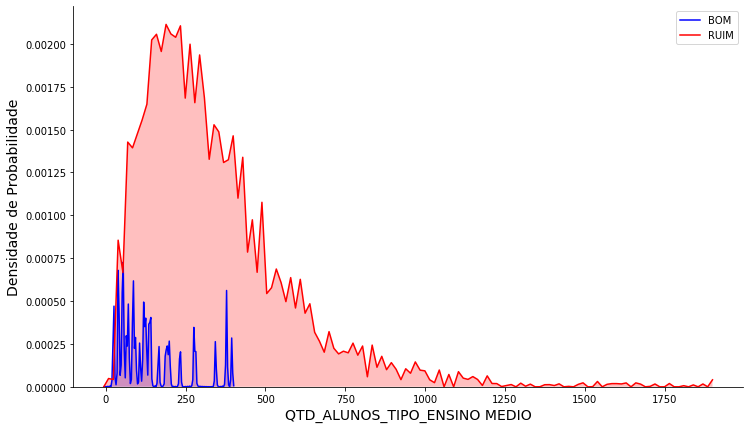

In [24]:
plot_kde_two_samples(dataset, 'QTD_ALUNOS_TIPO_ENSINO MEDIO', bw=2)

### Por esse motivo foi construido um modelo sem atributos dessa natureza para especializar mais o conhecimento das outras caracteristicas

In [7]:
cols_to_drop = ['QTD_ALUNOS_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS', 'QTD_ALUNOS_TIPO_ENSINO MEDIO', 'QTD_ALUNOS_TIPO_CEL', 'QTD_CLASSE_TIPO_ENSINO MEDIO', 'QTD_CLASSE_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS', 'QTD_CLASSE_TIPO_CEL']

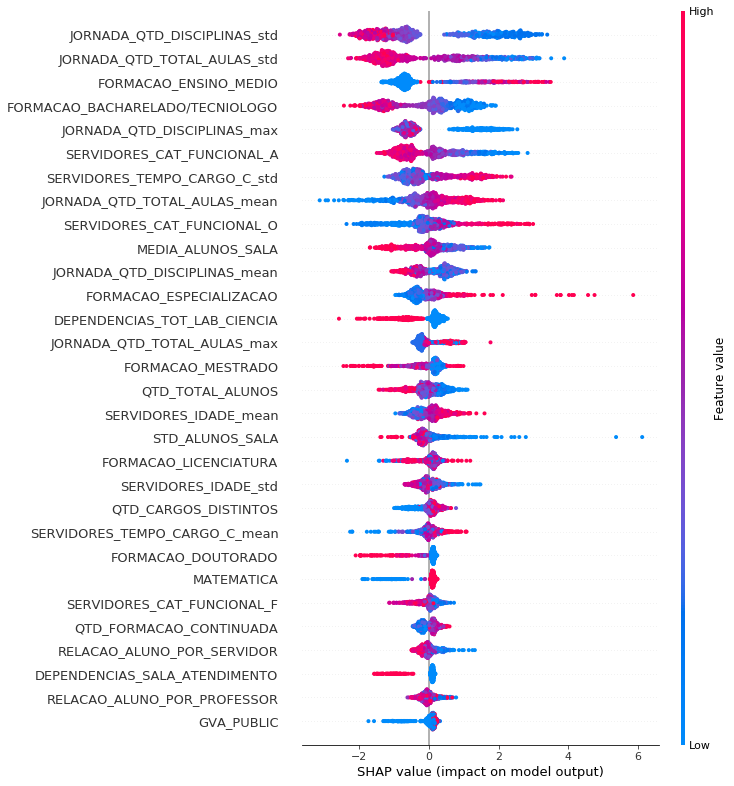

In [39]:
explainer = shap.TreeExplainer(model2)

shap_values = explainer.shap_values(X_test.drop(cols_to_drop, axis=1))
shap.summary_plot(shap_values[1], X_test.drop(cols_to_drop, axis=1), max_display=30)

### Quantidade media de alunos nas salas

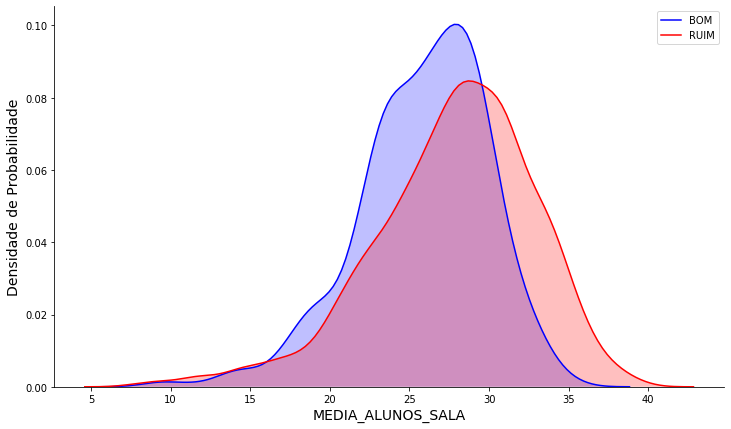

In [31]:
plot_kde_two_samples(dataset, 'MEDIA_ALUNOS_SALA')

### Titulo de Especializacao

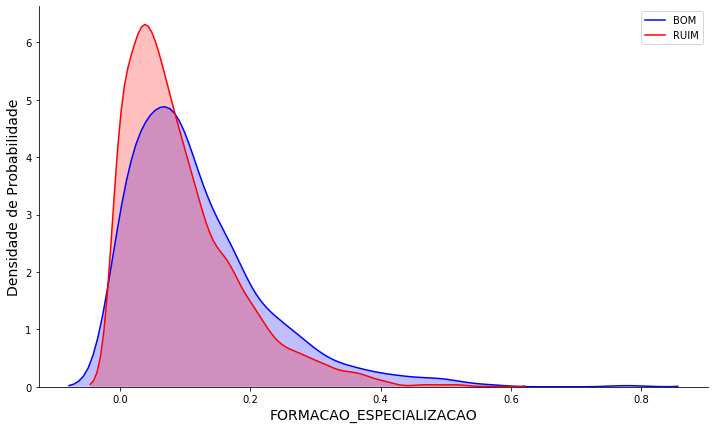

In [30]:
plot_kde_two_samples(dataset, 'FORMACAO_ESPECIALIZACAO')

### Quantidade total de alunos

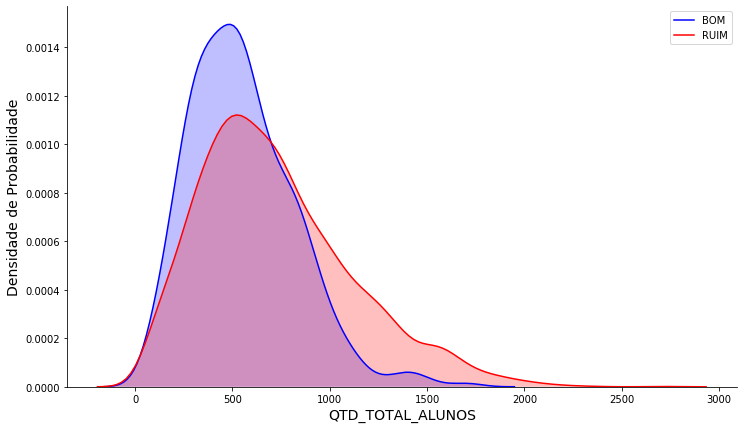

In [21]:
plot_kde_two_samples(dataset, 'QTD_TOTAL_ALUNOS')

### Titulo de Ensino Medio
O resultado desse atributo nao significa que o numero deve professores com ensino medio deve ser muito alto, mas sim que valores muito baixos impactaram negativamente. Ou seja, existe um impacto positivo de ter profissionais com essa titulacao dando aula. O valor desse atributo vai de 0 a 1, onde 1 eh 100% dos professores da escola.

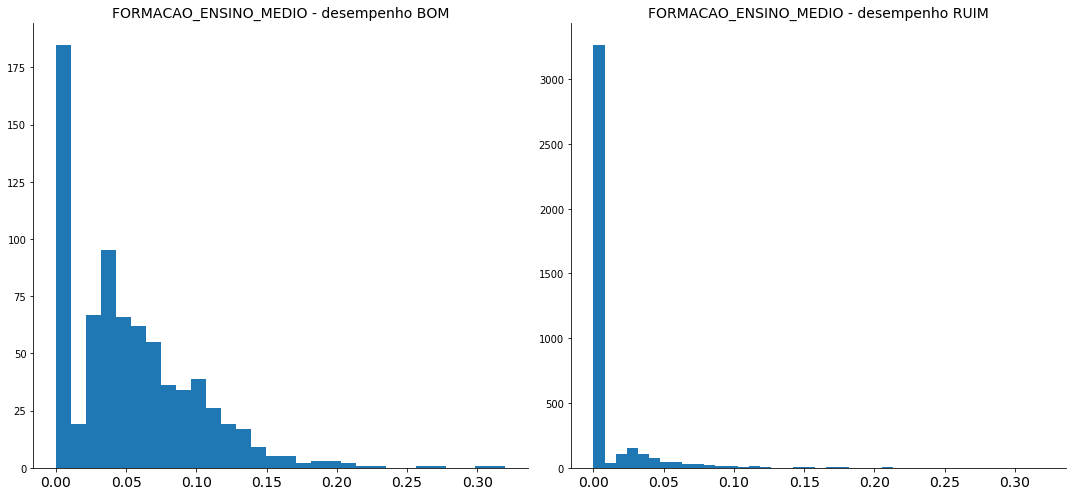

In [32]:
plot_two_hist(dataset, 'FORMACAO_ENSINO_MEDIO')

### Sobre a alocacao de disciplinas do professor, temos a **Media da quantidade total de Horas de Aulas** alta impactando positivamente enquanto a **Media da quantidade de Disciplinas** alta impacta negativamente

#### Quantidade media do total de hora de aula dos professores na escola

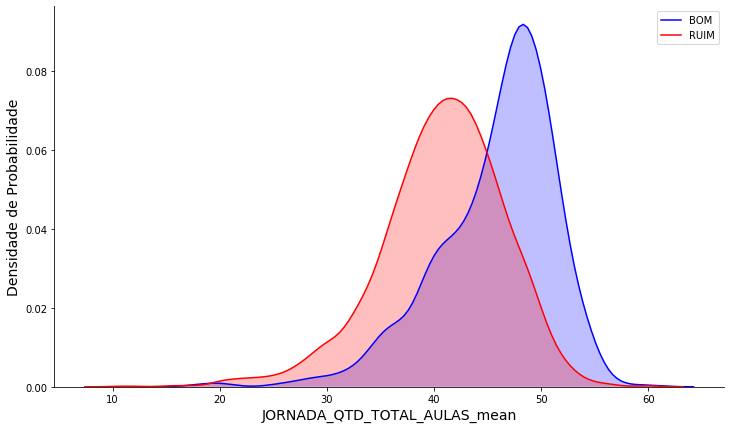

In [35]:
plot_kde_two_samples(dataset, 'JORNADA_QTD_TOTAL_AULAS_mean')

#### Quantidade media do total de disciplinas dos professores na escola

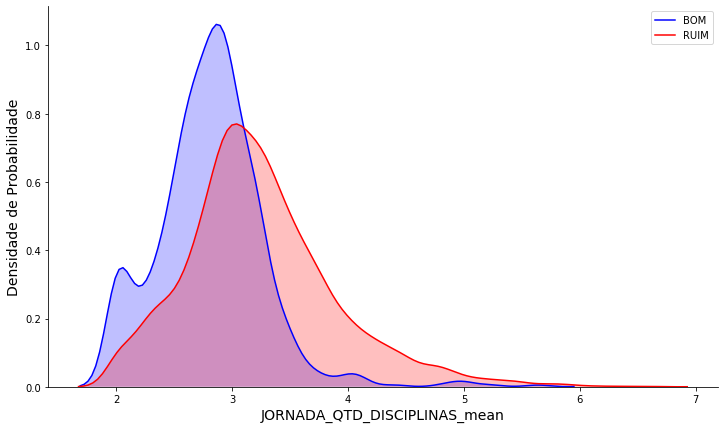

In [37]:
plot_kde_two_samples(dataset, 'JORNADA_QTD_DISCIPLINAS_mean')

## Regras a partir de Arvore de Decisao

In [44]:
X = X_train.drop(cols_to_drop, axis=1)

In [47]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=X.columns.to_list(), class_names=['RUIM', 'BOM'],
                filled=True, rounded=True, proportion=True, max_depth=4)

In [48]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [50]:
graph.write_png('../reports/figures/tree.png')

True

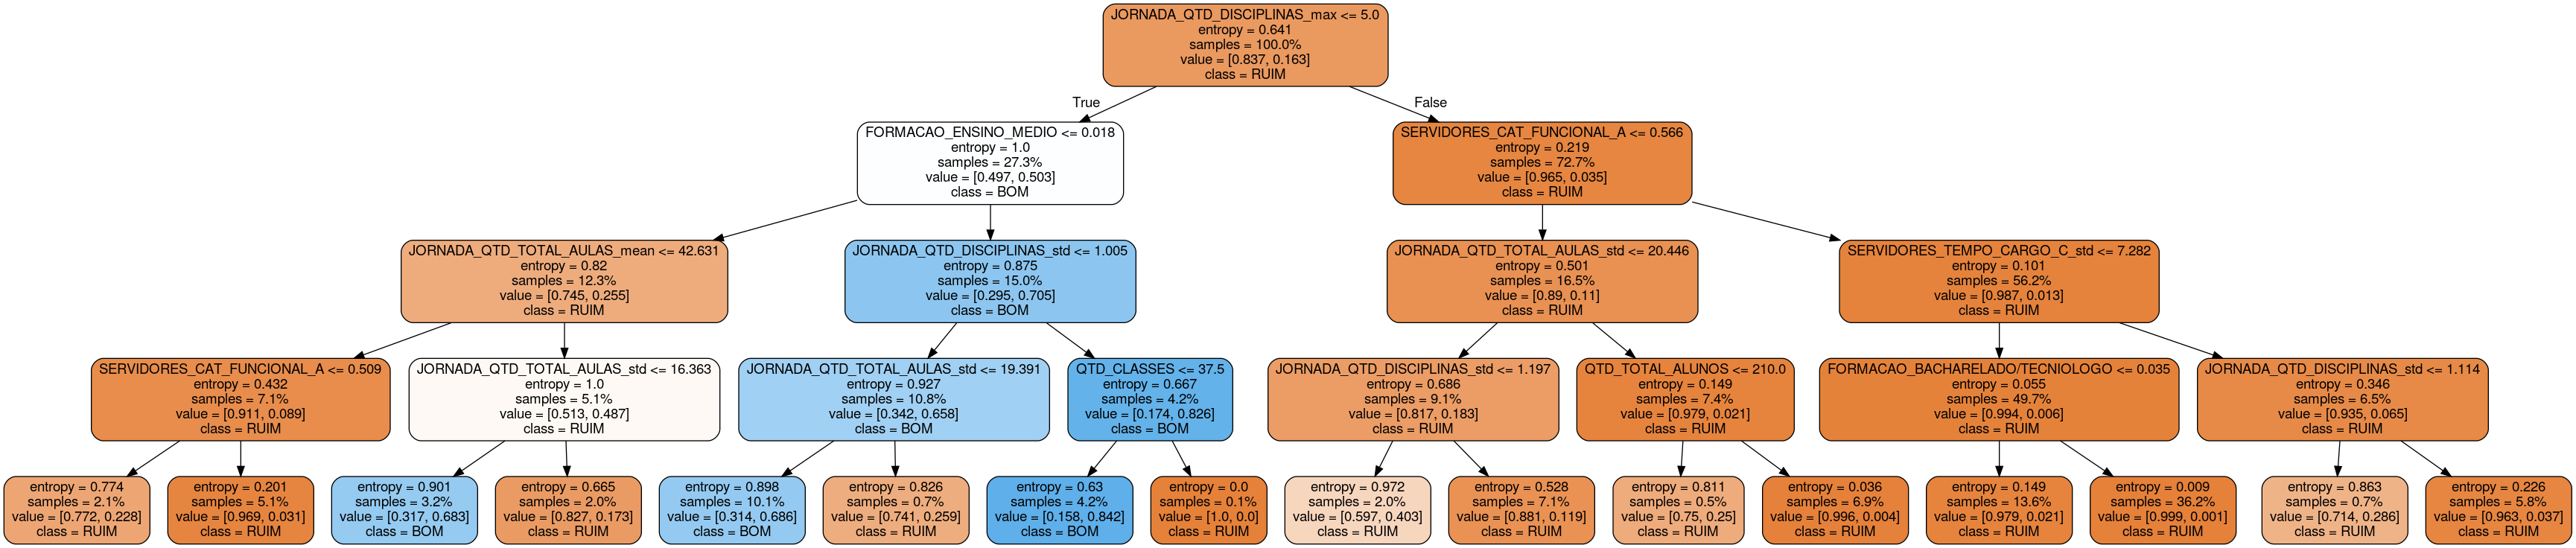

In [51]:
Image(graph.create_png())